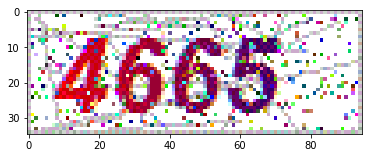

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image = cv2.imread("captua.png")
plt.imshow(image)

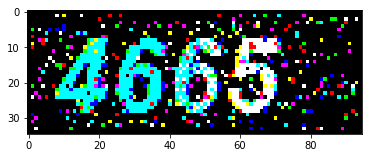

In [3]:
retval, im2 = cv2.threshold(image, 115, 255, cv2.THRESH_BINARY_INV)
plt.imshow(im2)

In [7]:
def tran_gray(jpg_path):
    #jpg_path = 't1.jpg'
    image = Image.open(jpg_path)
    #灰度化处理
    #有很多种算法，这里选择rgb加权平均值算法
    gray_image = Image.new('L', image.size)
    #获得rgb数据序列，每一个都是(r,g,b)三元组
    raw_data = image.getdata()
    gray_data = []
    for rgb in raw_data:
        value = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
        #value就是灰度值，这里使用127作为阀值，
        #小于127的就认为是黑色也就是0 大于等于127的就是白色，也就是255
        if value < 127:
            gray_data.append(0)
        else:
            gray_data.append(255)
    
    gray_image.putdata(gray_data)
    return gray_image

def xrange(x):

    return iter(range(x))

def input_image_pix_and_plot(jpg_path):
    #jpg_path = 't1.jpg'
    image = cv2.imread(jpg_path, cv2.IMREAD_COLOR)
    plt.imshow(image)
    plt.show()
    return image

def catch_axis_start_and_end(im4,axis='x'):

    if(axis=='x'):
        split = []
        for i in range(im4.shape[1]):
            if( sum( im4[:,i,0] ) != 0 ):
                split.append(i)
                
        split_num_start = [split[0]]
        split_num_end = []     
           
        for i in range(2,len(split),1):
            #print(i)
            if(split[i]-split[i-1]>3): #and split[i-1]-split[i-2]!=1):
                split_num_end.append(split[i-1])
                split_num_start.append(split[i])
                #print(split[i])
        split_num_end.append(split[len(split)-1])
    elif(axis=='y'):
        split = []
        for i in range(im4.shape[0]):
            if( sum( im4[i,:,0] ) != 0 ):
                split.append(i)
        split_num_start = min(split)
        split_num_end = max(split)
    
    return split_num_start,split_num_end
    
def my_plt_fun(split_num_start,split_num_end,k):
    
    start = split_num_start[k]-3
    end = split_num_end[k]+3
    img = im4[:,start:end,:]
    
    plt.imshow(img)
    
    y_start,y_end = catch_axis_start_and_end(img,axis='y')
    y_start = y_start-3
    y_end = y_end+3
    
    img2 = img[y_start:y_end,:,:]
    plt.imshow(img2)
    plt.savefig('split_image_' + str(k) + '.png')
    return img2



In [8]:
im3 = del_mis_pt_by_threshold(im2)
plt.imshow(im3)

NameError: name 'del_mis_pt_by_threshold' is not defined

In [9]:
im4 = cv2.dilate(im3, (2, 2), iterations=1)
plt.imshow(im4)
# save figure
plt.savefig('del_mix_pt.png')

NameError: name 'im3' is not defined

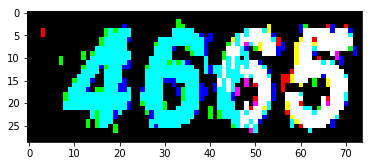

In [54]:

x_split_start,x_split_end = catch_axis_start_and_end(im4,axis='x')

# for example
img1 = my_plt_fun(x_split_start,x_split_end,0)
plt.imshow(img1)

# split number and save figure
for i in range(len(x_split_start)):
    my_plt_fun(x_split_start,x_split_end,i)
